In [1]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

wine_data = pd.read_csv('winequality/winequality-red.csv', delimiter=';')

# Разделение данных на факторы (независимые переменные) и классы (целевая переменная)
X = wine_data.drop('quality', axis=1).values
y = wine_data['quality'].values

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Создание топологии ИИ
model = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Step 3: Обучение ИИ
model.fit(X_scaled, y)

# Step 4: Применение обученного ИИ для предсказания классов на новых данных
predictions = model.predict(X_scaled)

# Output results
for i in range(len(X_scaled)):
    print(f"Input: {X_scaled[i]}, Predicted: {predictions[i]}, Actual: {y[i]}")

Input: [-0.52835961  0.96187667 -1.39147228 -0.45321841 -0.24370669 -0.46619252
 -0.37913269  0.55827446  1.28864292 -0.57920652 -0.96024611], Predicted: 5, Actual: 5
Input: [-0.29854743  1.96744245 -1.39147228  0.04341614  0.2238752   0.87263823
  0.62436323  0.02826077 -0.7199333   0.1289504  -0.58477711], Predicted: 5, Actual: 5
Input: [-0.29854743  1.29706527 -1.18607043 -0.16942723  0.09635286 -0.08366945
  0.22904665  0.13426351 -0.33117661 -0.04808883 -0.58477711], Predicted: 5, Actual: 5
Input: [ 1.65485608 -1.38444349  1.4841536  -0.45321841 -0.26496041  0.10759209
  0.41150046  0.6642772  -0.97910442 -0.46118037 -0.58477711], Predicted: 6, Actual: 6
Input: [-0.52835961  0.96187667 -1.39147228 -0.45321841 -0.24370669 -0.46619252
 -0.37913269  0.55827446  1.28864292 -0.57920652 -0.96024611], Predicted: 5, Actual: 5
Input: [-0.52835961  0.73841761 -1.39147228 -0.5241662  -0.26496041 -0.27493098
 -0.19667889  0.55827446  1.28864292 -0.57920652 -0.96024611], Predicted: 5, Actual: 

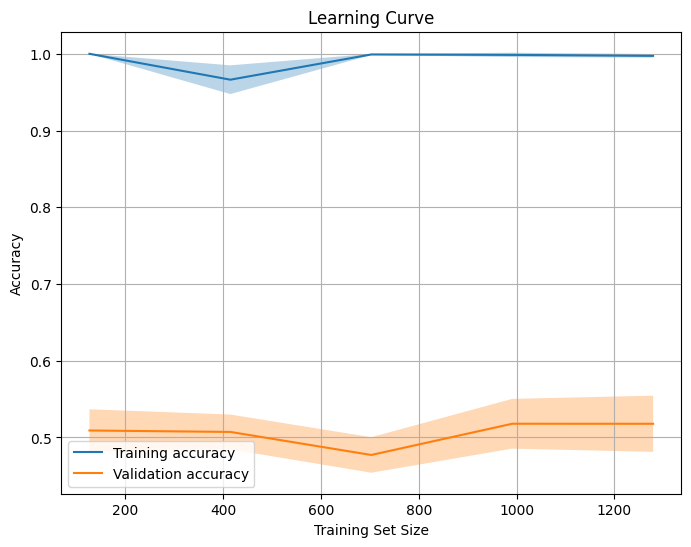

In [2]:
train_sizes, train_scores, test_scores = learning_curve(model, X_scaled, y, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training accuracy')
plt.plot(train_sizes, test_mean, label='Validation accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.3)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.3)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

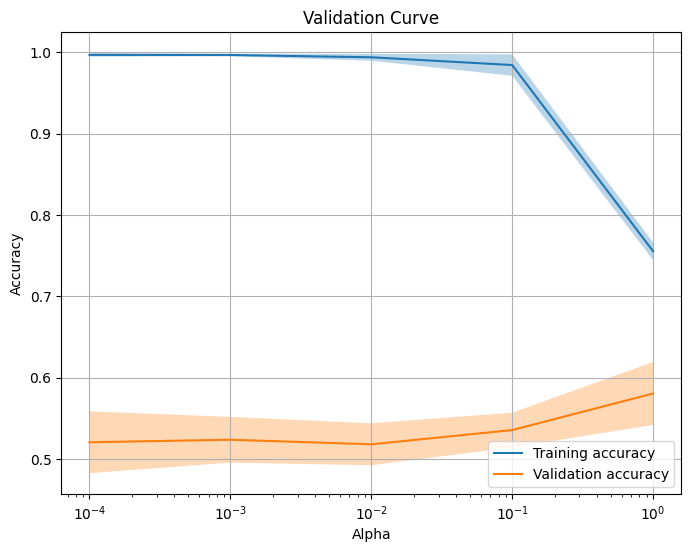

In [3]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1]
train_scores, test_scores = validation_curve(model, X_scaled, y, param_name='alpha', param_range=param_range, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(param_range, train_mean, label='Training accuracy')
plt.plot(param_range, test_mean, label='Validation accuracy')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.3)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.3)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Validation Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

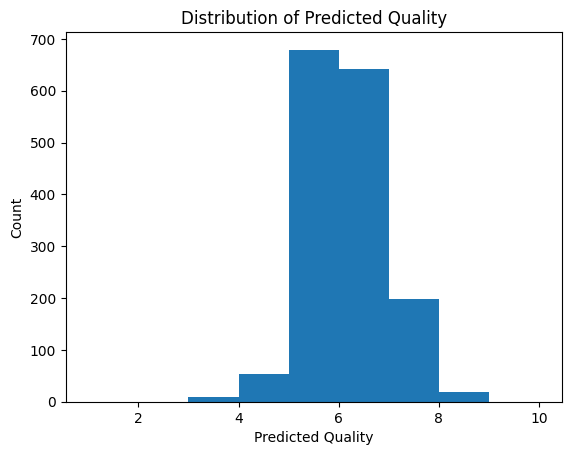

In [4]:
plt.hist(predictions, bins=range(1, 11))
plt.xlabel('Predicted Quality')
plt.ylabel('Count')
plt.title('Distribution of Predicted Quality')
plt.show()